In [47]:
!pip install seaborn
!pip install scikit-learn
!pip install lightgbm

# 0.INSTALLING LIBRARIES.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1.DATA COLLECTING / CLEANING 

In [49]:
def load_dataset(csv_file):
    return pd.read_csv(csv_file)
#Loading Dataset.

In [50]:
load_dataset('red.csv')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,Fryance,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


In [51]:
load_dataset('rose.csv')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Mad Méditerranée Rosé 2019,France,Méditerranée,Château Camparnaud,4.0,25,10.11,2019
1,Redoma Rosé 2019,Portugal,Douro,Niepoort,3.9,25,12.81,2019
2,Fantini Cerasuolo d'Abruzzo 2019,Italy,Abruzzo,Farnese,3.6,25,5.60,2019
3,Mount Hermon Rosé 2017,Israel,Galilee,Hermon,3.4,25,12.14,2017
4,La Villa Rosé 2018,France,Languedoc,Château La Sauvageonne,4.6,25,68.95,2018
...,...,...,...,...,...,...,...,...
392,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019
393,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019
394,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019
395,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.


In [52]:
load_dataset('sparkling.csv')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.
...,...,...,...,...,...,...,...,...
1002,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.
1003,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.
1004,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.
1005,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.


In [53]:
load_dataset('white.csv')

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018
...,...,...,...,...,...,...,...,...
3759,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019
3760,Vinho Verde Sweet N.V.,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,N.V.
3761,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018
3762,Sauvignon Blanc 2019,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019


In [54]:
def collect_dataset():
    df_red = load_dataset('red.csv')
    df_red['Type'] = 'red'
    df_rose = load_dataset('rose.csv')
    df_rose['Type'] = 'rose' 
    df_sparkling = load_dataset('sparkling.csv')
    df_sparkling['Type'] = 'sparkling'
    df_white = load_dataset('white.csv')
    df_white['Type'] = 'white'
    df = pd.concat([df_red,df_rose,df_sparkling,df_white],ignore_index = True)
    return df
df = collect_dataset()
#Data Collecting.

In [55]:
df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,Fryance,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019,white
13830,Vinho Verde Sweet N.V.,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,N.V.,white
13831,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018,white
13832,Sauvignon Blanc 2019,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019,white


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [57]:
def clean_dataset():
    df.Name = df.Name.str.replace('\d+', '',regex = True).str.replace('N.V.','')
    df.Year = df.Year.str.replace('N.V.','2023',regex = True).astype(int)
    return df
clean_df = clean_dataset()
#Cleaning Dataset.
clean_df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac,Fryance,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Sauvignon Blanc,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019,white
13830,Vinho Verde Sweet,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,2023,white
13831,Sauvignon Blanc,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018,white
13832,Sauvignon Blanc,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019,white


In [58]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 972.8+ KB


# 2.Data Exploration

In [59]:
def summarize_dataset(df):
    print('Dataset dimension:')
    print(df.shape)
#     print()
#     print('First 10 rows of dataset:')
#     print(df.head(10))
    print()
    print('Statistical summary:')
    print(df.describe())
summarizing_data = summarize_dataset(clean_df)
#Summarizing Clean Dataframe.

Dataset dimension:
(13834, 9)

Statistical summary:
             Rating  NumberOfRatings         Price          Year
count  13834.000000     13834.000000  13834.000000  13834.000000
mean       3.865664       428.322466     33.024850   2015.933425
std        0.296427      1838.413812     70.899893      3.605037
min        2.200000        25.000000      3.150000   1961.000000
25%        3.700000        56.000000      9.902500   2015.000000
50%        3.900000       129.000000     15.950000   2016.000000
75%        4.100000       336.000000     32.500000   2018.000000
max        4.900000     94287.000000   3410.790000   2023.000000


In [60]:
def compute_correlations(df):
    return df.corr()
computing_correlation = compute_correlations(clean_df) 
computing_correlation
#Compute correlation

,Rating,NumberOfRatings,Price,Year
Rating,1.000000,0.065520,0.450654,-0.316446
NumberOfRatings,0.065520,1.000000,0.021794,0.076267
Price,0.450654,0.021794,1.000000,-0.346311
Year,-0.316446,0.076267,-0.346311,1.000000


In [61]:
df = clean_df
df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac,Fryance,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Sauvignon Blanc,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019,white
13830,Vinho Verde Sweet,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,2023,white
13831,Sauvignon Blanc,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018,white
13832,Sauvignon Blanc,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019,white


# 3.DATA VISUALIZATION

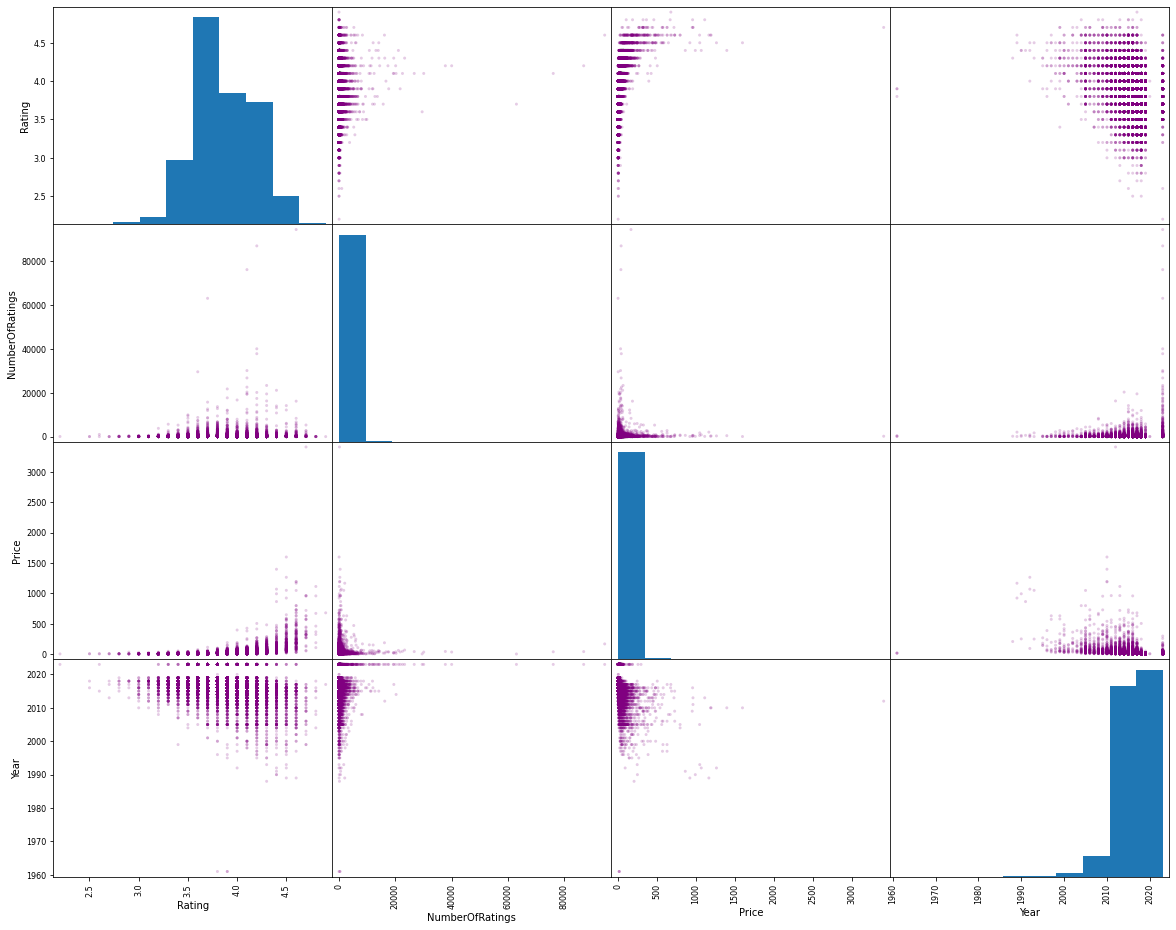

In [62]:
def print_scatter_matrix():
    data = df[['Rating','NumberOfRatings','Price','Year']]
    pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20,16),color = 'purple')
print_scatter_matrix() 
#Printing scatter matrix.

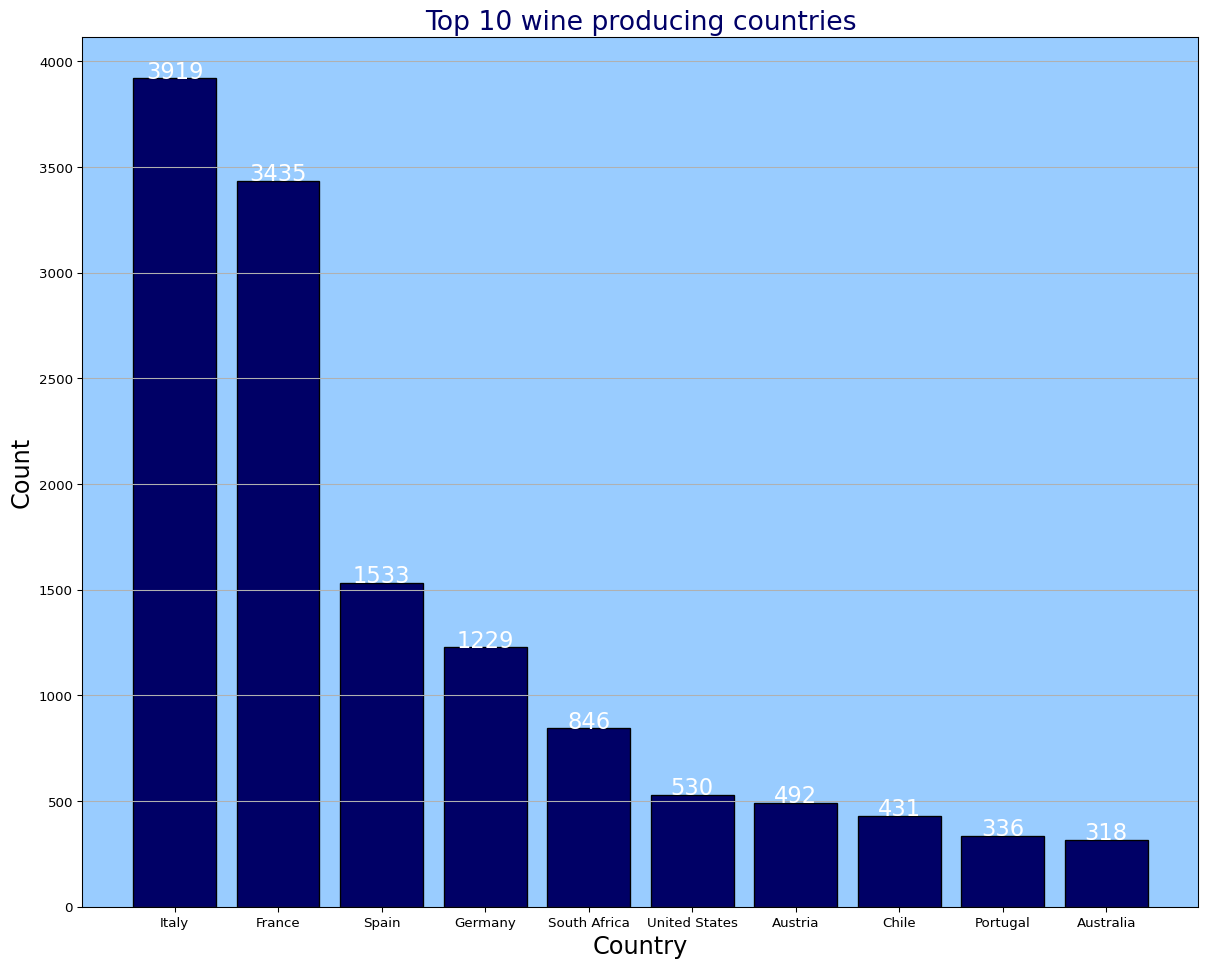

In [63]:
def plot_bar():
    top10_con = df['Country'].value_counts()[:10]
    key_con , value_con = list(top10_con.keys()),list(top10_con.values)
    df_count = pd.DataFrame({'Country':key_con,'Count':value_con})
    fig, ax = plt.subplots(figsize=(15,12), dpi = 96)
    bar1 = ax.bar(df_count['Country'], df_count['Count'], width=0.8,color = '#000066',edgecolor = 'black')
    for i in range(len(key_con)):
        plt.text(i, value_con[i], value_con[i], ha = 'center',color = '#FFFFFF',fontsize = 17)
    plt.grid(axis ='y')
    plt.title('Top 10 wine producing countries',fontsize=20,color = '#000066')
    plt.xlabel('Country',fontsize=18)
    plt.ylabel('Count',fontsize=18)
    ax = plt.gca() 
    ax.set_facecolor('#99CCFF')
    plt.show()
plot_bar()
#TOP 10 WINE PRODUCING COUNTRIES. 

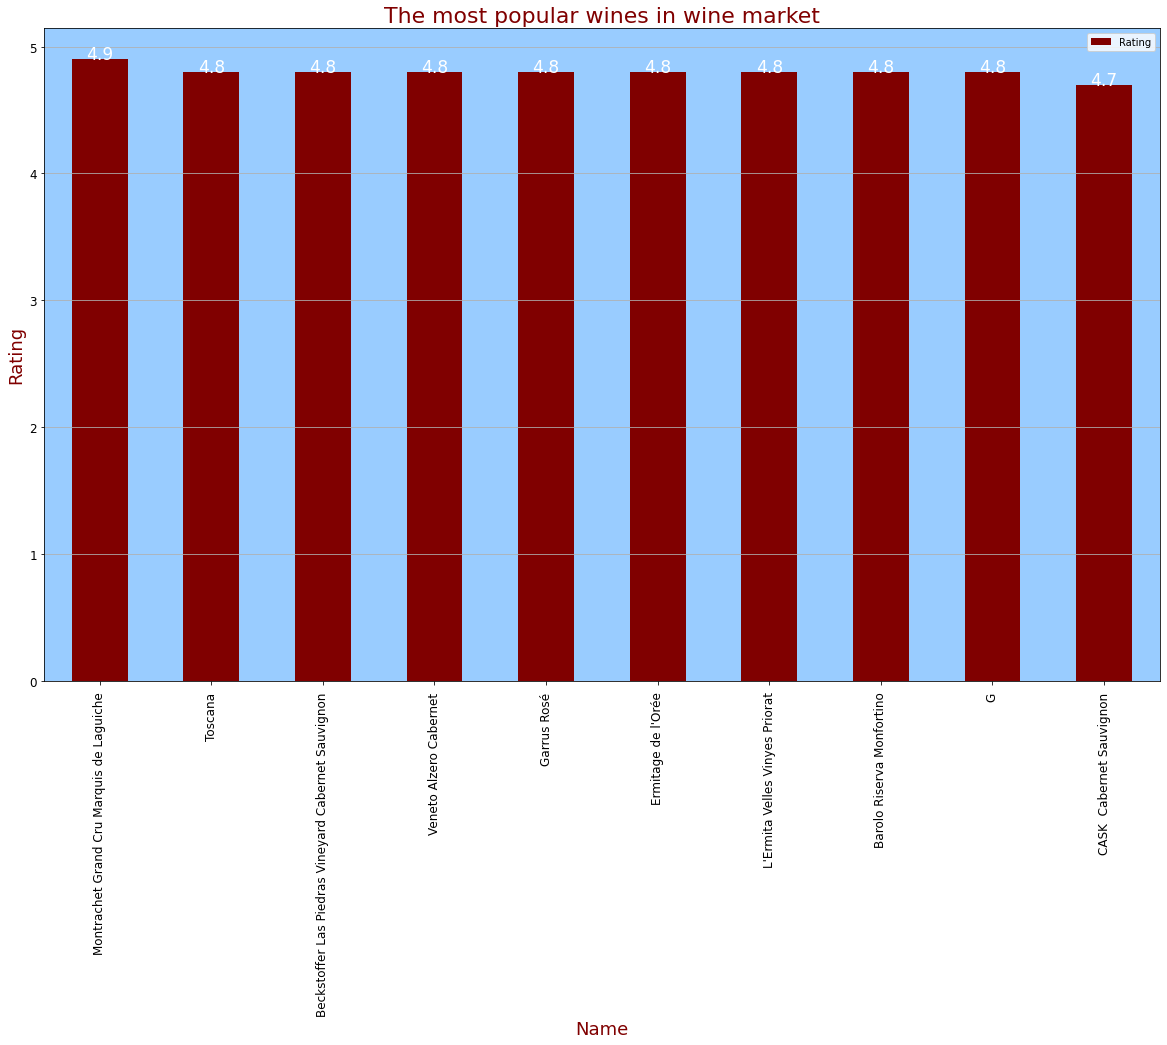

In [64]:
def plot_bar2():
    df_rating = pd.DataFrame()
    df_rating['Name'] =  df.sort_values('Rating')[::-1][:10]['Name']
    df_rating['Rating'] =  df.sort_values('Rating')[::-1][:10]['Rating'].astype(float)
    df_rating['Type'] =  df.sort_values('Rating')[::-1][:10]['Type']
    df_rating = df_rating.reset_index(drop = True)
    colors = {'white':'grey','red' : 'maroon','sparkling' : 'aqua','rose' : 'pink'}
    ax = df_rating.plot(kind='bar',x='Name',figsize =(20,12),  color = 'maroon',width = 0.5,fontsize = 12)
    for i in range(10):
        plt.text(i, df_rating['Rating'][i],df_rating['Rating'][i], ha = 'center',color = '#FFFFFF',fontsize = 17)
    plt.grid(axis = 'y')
    plt.title('The most popular wines in wine market',fontsize = 22,c='maroon')
    plt.xlabel('Name',fontsize=18,c='maroon')
    plt.ylabel('Rating',fontsize=18,c='maroon')
    ax = plt.gca()
    ax.set_facecolor('#99CCFF')
    plt.show()
plot_bar2()
#The most popular wines in wine market.

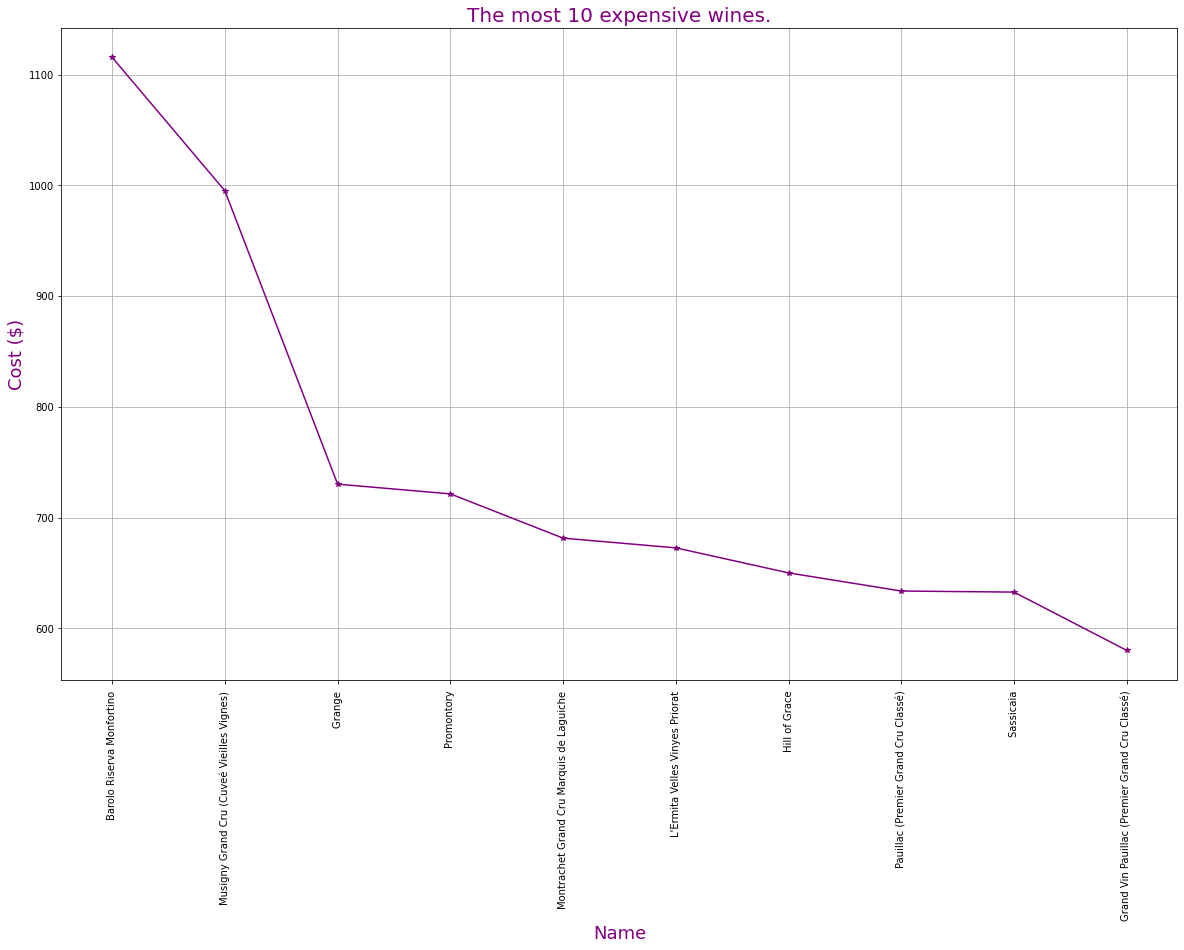

In [65]:
df_costs = pd.DataFrame()
df_costs['Name'] = df['Name']
df_costs['Price'] = df['Price']
df_costs['Type'] = df['Type']
df_costs['Year'] = df['Year']
df10_costs = df_costs.drop_duplicates(subset=['Name'],keep='first').sort_values(by = 'Price',ascending=False).reset_index(drop = True)[:10]
def plot_graph():
    plt.figure(figsize = (20,12))
    plt.grid()
    plt.plot(df10_costs['Name'],df10_costs['Price'],marker='*',color = 'purple')
    plt.title('The most 10 expensive wines.',fontsize = 20, color='purple')
    plt.ylabel('Cost ($)',fontsize = 18,color='purple')
    plt.xlabel('Name', fontsize = 18,color='purple')
    plt.xticks(rotation ='vertical')
    plt.show()
plot_graph()
#The most 10 expensive wines.

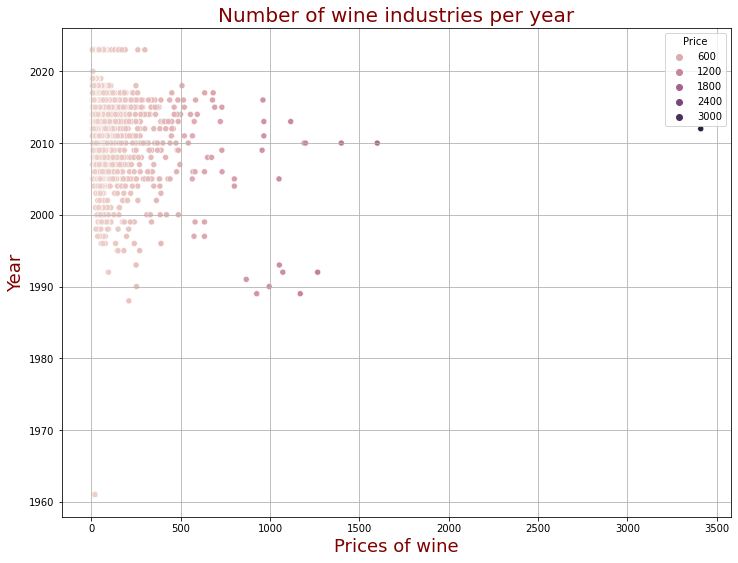

In [66]:
def plot_scatter():
    plt.figure(figsize = (12,9))
    sns.scatterplot(data=df_costs, x="Price", y='Year',hue='Price',sizes=(1,100))
    plt.title('Number of wine industries per year',fontsize=20,color='maroon')
    plt.xlabel('Prices of wine',fontsize=18,color='maroon')
    plt.ylabel('Year',fontsize=18,color='maroon')
    plt.grid()
    plt.show()
plot_scatter()
#It will show number of wine industries per year.

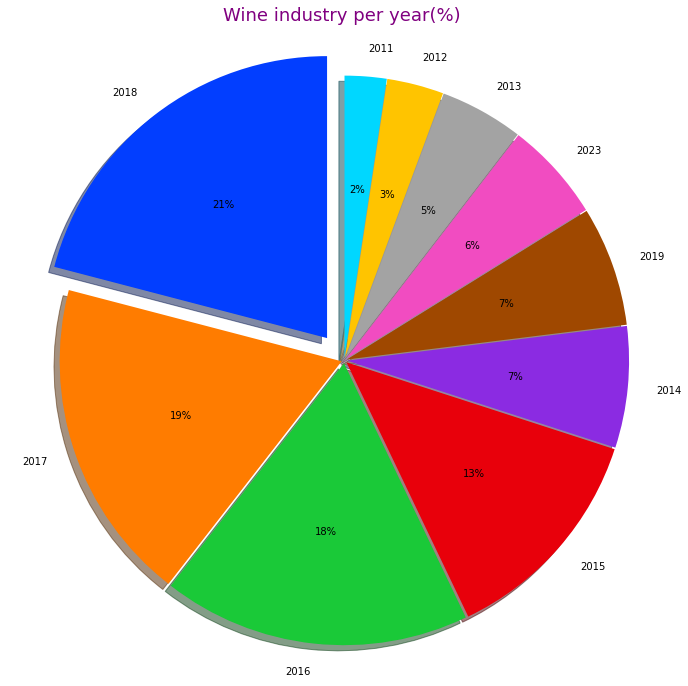

In [67]:
def plot_pie():
    count_year = df_costs['Year'].value_counts()[:10]
    years = list(count_year.keys())
    counts = list(count_year.values)
    palette_color = sns.color_palette('bright')
    plt.figure(figsize=(12,12))
    plt.title('Wine industry per year(%)',fontsize=18,color='purple')
    explode = [0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
    plt.pie(counts, labels=years, colors=palette_color,autopct='%1.0f%%',explode=explode,shadow=True,startangle=90)
    plt.axis('equal')
    plt.show()
plot_pie()
#It will show number of wine industries per year with percent.

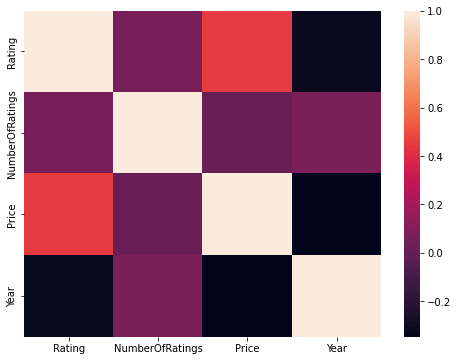

In [68]:
def plot_corr():
    plt.figure(figsize = (8,6))
    sns.heatmap(computing_correlation)
    plt.show()
plot_corr() 

# 4.MACHINE LEARNING

In [ ]:
def fit_model_prediction():
    X = df[['Rating','NumberOfRatings','Price','Year']]
    y = df['Price']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
#     model = KNeighborsRegressor()
#     model = LinearRegression()
#     model = LinearSVR()
    model = LGBMRegressor(n_estimators=1000)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {round(r2_score(y_test,y_pred)*100)}%")
fit_model_prediction()